In [1]:
# Install libraries
!pip install nltk pandas scikit-learn matplotlib seaborn wordcloud


In [2]:
# Import libraries
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Download NLTK resources
nltk.download('movie_reviews', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

from nltk.corpus import movie_reviews, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [4]:
# Import libraries
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Download NLTK resources
nltk.download('movie_reviews', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt_tab', quiet=True)  # Corrected: Download the punkt_tab tokenizer data

from nltk.corpus import movie_reviews, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [5]:
# Load movie reviews dataset
documents = [
    (" ".join(movie_reviews.words(fileid)), category)
    for category in movie_reviews.categories()
    for fileid in movie_reviews.fileids(category)
]

# Convert to DataFrame
df = pd.DataFrame(documents, columns=["review", "sentiment"])

# Preprocess text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenize
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatization
    return ' '.join(tokens)

df['processed_review'] = df['review'].apply(preprocess_text)


<ipython-input-6-c86e607eb505>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


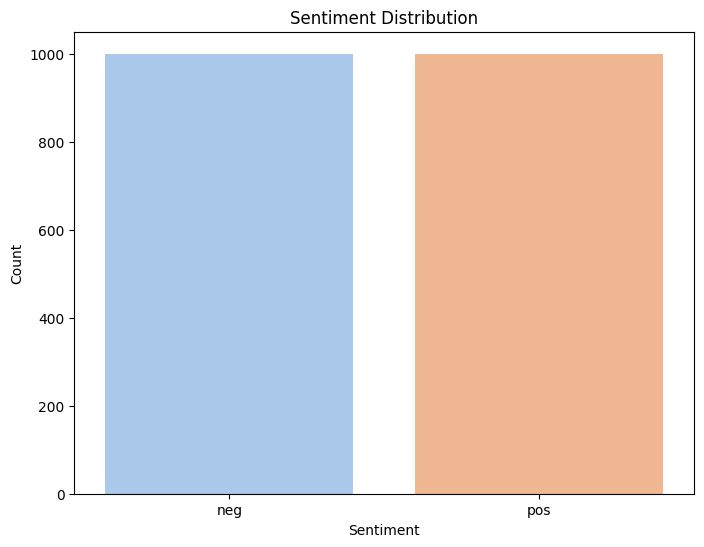

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


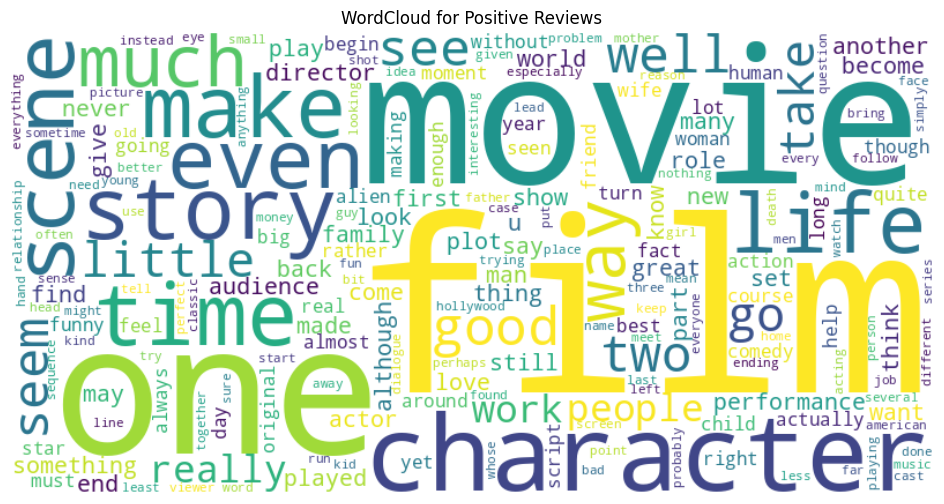

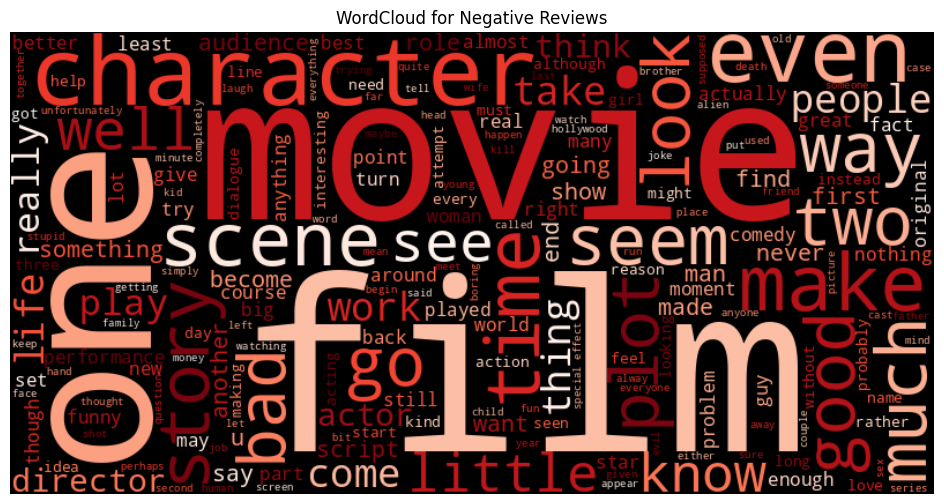

In [7]:
positive_reviews = " ".join(df[df['sentiment'] == 'pos']['processed_review'])
negative_reviews = " ".join(df[df['sentiment'] == 'neg']['processed_review'])

# WordCloud for positive reviews
plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Positive Reviews')
plt.show()

# WordCloud for negative reviews
plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Negative Reviews')
plt.show()


In [8]:
tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(df['processed_review'])
tfidf_features = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Display top features by frequency
feature_sums = tfidf_features.sum().sort_values(ascending=False)
print("Top Features by Frequency:")
print(feature_sums.head(10))


Top Features by Frequency:
film         154.422722
movie        113.982237
one           86.728359
character     66.103052
like          62.776900
time          52.958593
get           52.243762
scene         51.478423
story         49.151788
good          48.435892
dtype: float64


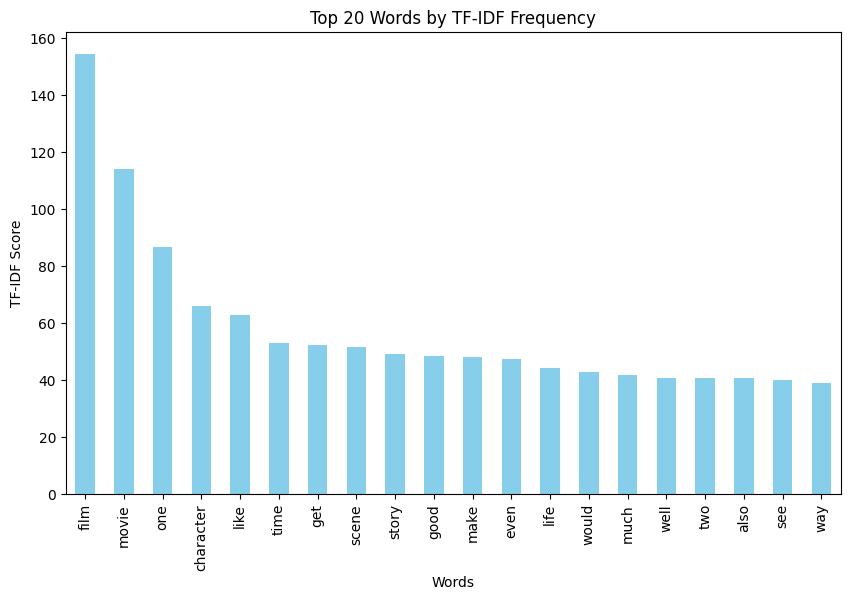

In [9]:
plt.figure(figsize=(10, 6))
feature_sums.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Words by TF-IDF Frequency')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.show()


In [10]:
X = df['processed_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
nb_model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=3000)),
    ('clf', MultinomialNB())
])
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)


In [12]:
rf_model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=3000)),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [14]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))




Naive Bayes Accuracy: 0.7875

Naive Bayes Classification Report:
              precision    recall  f1-score   support

         neg       0.77      0.82      0.79       199
         pos       0.81      0.76      0.78       201

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



In [15]:
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.81

Random Forest Classification Report:
              precision    recall  f1-score   support

         neg       0.77      0.87      0.82       199
         pos       0.86      0.75      0.80       201

    accuracy                           0.81       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400



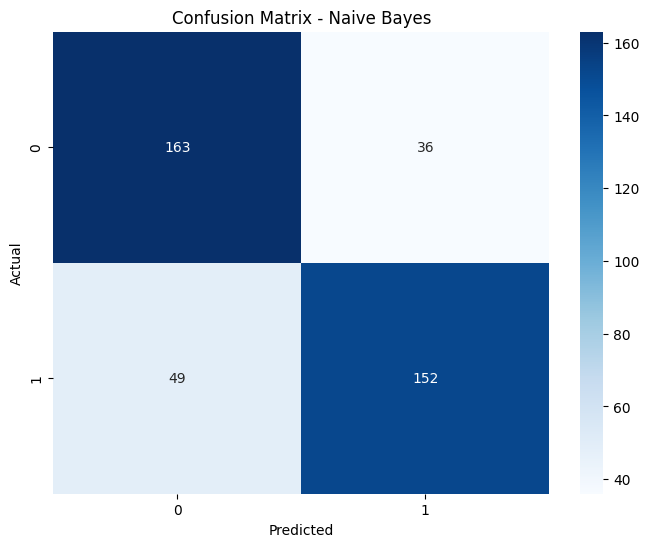

In [16]:
# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

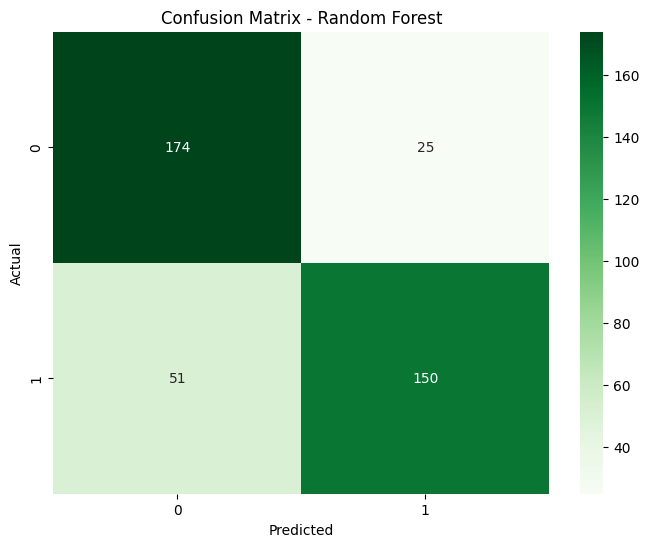

In [17]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [18]:
test_texts = [
    "I absolutely loved this movie! It was fantastic.",
    "It was a terrible film. I hated it.",
    "The movie was okay, nothing special."
]

for text in test_texts:
    processed_text = preprocess_text(text)
    prediction_nb = nb_model.predict([processed_text])[0]
    prediction_rf = rf_model.predict([processed_text])[0]
    print(f"\nText: {text}")
    print(f"Naive Bayes Prediction: {prediction_nb}")
    print(f"Random Forest Prediction: {prediction_rf}")



Text: I absolutely loved this movie! It was fantastic.
Naive Bayes Prediction: pos
Random Forest Prediction: pos

Text: It was a terrible film. I hated it.
Naive Bayes Prediction: neg
Random Forest Prediction: pos

Text: The movie was okay, nothing special.
Naive Bayes Prediction: neg
Random Forest Prediction: neg


<ipython-input-19-47eaf90093af>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


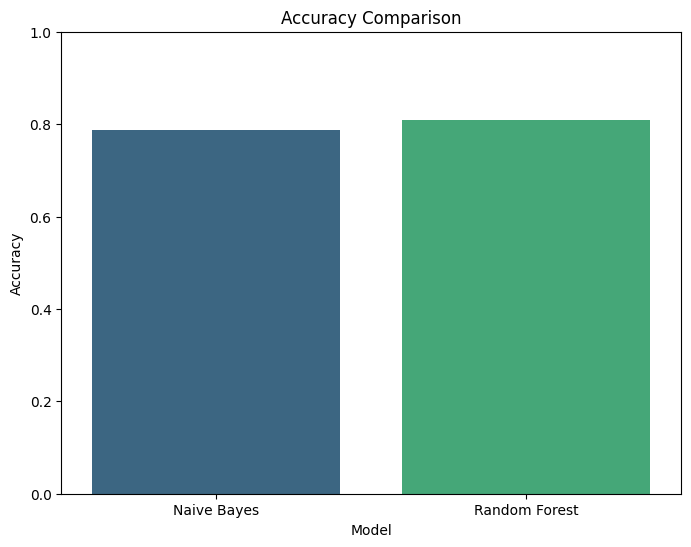

In [19]:
# Comparing Model Accuracy
models = ['Naive Bayes', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_rf)]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
